In [1]:
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from dataclasses import dataclass

import pandas as pd
from scipy.stats import pearsonr
sns.set()
sns.set_context('poster')

In [2]:
@dataclass
class StudentModel:
    model_name: str
    model_dir: str
    student_name: str
    model_size: str
    model_perf: float
    perf_comment: str
    model_parameters: int

In [3]:
def load_student_models():
    with open('./student_model_performances.dat', 'rb') as fin:
        while True:
            try:
                yield pickle.load(fin)
            except EOFError:
                break

student_models = list(load_student_models())[0]

In [4]:
print('\nNumber of small and big models:')
print(pd.value_counts([x.model_size for x in student_models]))

print('\nNumber of models submitted per student')
print(
    pd.value_counts(
        pd.value_counts([x.student_name for x in student_models]).values
    )
)

print('\n Summary of accuracies')
print(pd.Series([x.model_perf for x in student_models]).describe())

print('\n Summary of accuracies of SMALL models')
print(pd.Series(
    [x.model_perf for x in student_models if x.model_parameters < 5000]
).describe())

print('\n Summary of accuracies of BIG models')
print(pd.Series(
    [x.model_perf for x in student_models if x.model_parameters > 5000]
).describe())


Number of small and big models:
big      47
small    46
dtype: int64

Number of models submitted per student
2    42
1     9
dtype: int64

 Summary of accuracies
count    93.000000
mean      0.787718
std       0.219350
min       0.091111
25%       0.797778
50%       0.862222
75%       0.895556
max       0.957778
dtype: float64

 Summary of accuracies of SMALL models
count    42.000000
mean      0.749894
std       0.229575
min       0.093333
25%       0.770000
50%       0.848889
75%       0.865556
max       0.897778
dtype: float64

 Summary of accuracies of BIG models
count    50.000000
mean      0.817156
std       0.209401
min       0.091111
25%       0.816667
50%       0.892222
75%       0.920000
max       0.957778
dtype: float64


Text(0.5, 21.919999999999973, 'accuracy')

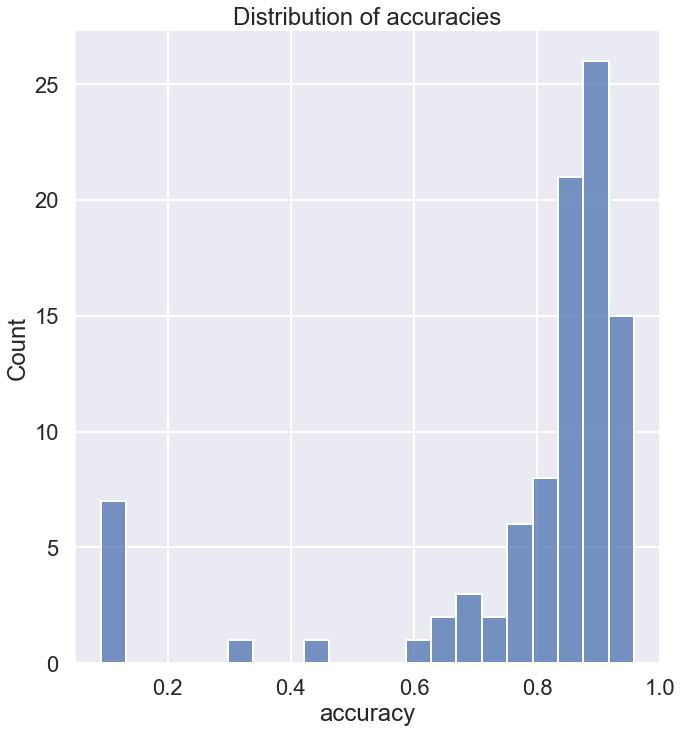

In [5]:
sns.displot([x.model_perf for x in student_models], height=10)
plt.title('Distribution of accuracies')
plt.xlabel('accuracy')

/Users/phil/anaconda3/envs/pytorch_base/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[None]

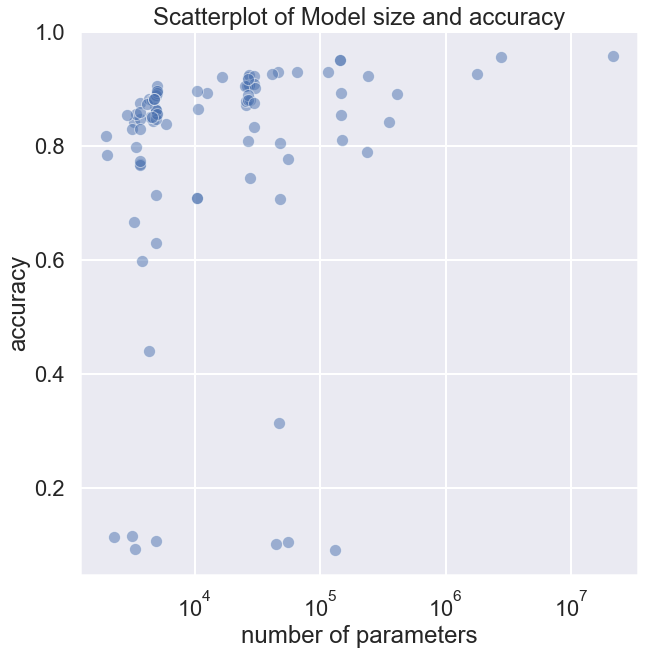

In [6]:
accuracy = [x.model_perf for x in student_models]
model_size = [x.model_parameters for x in student_models]

plt.figure(figsize=(10,10))
a = sns.scatterplot(
    model_size,
    accuracy,
    alpha=.5
)

plt.title('Scatterplot of Model size and accuracy')
plt.xlabel('number of parameters')
plt.ylabel('accuracy')
a.set(xscale='log')

Text(0.5, 1.0, 'Differences between model sizes')

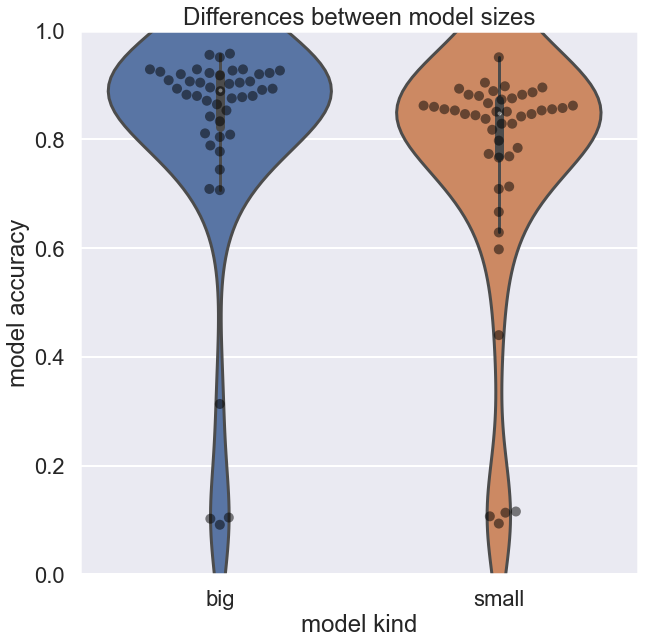

In [7]:
model_kind = [x.model_size for x in student_models]

plt.figure(figsize=(10, 10))
sns.violinplot(y = accuracy, x = model_kind, split=True)
sns.swarmplot(y = accuracy, x = model_kind, 
              color='black', size=10, alpha=.5)
plt.ylim(0,1)
plt.xlabel('model kind')
plt.ylabel('model accuracy')
plt.title('Differences between model sizes')